
<center> <b>SENHAJI AHMED - OUKESSOU SOUFIANE</b> </center>

---

<center> <b>Projet d'Analyse et de Prédiction de Séries Chronologiques (Apple Stock)</b> </center>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('aapl.csv')

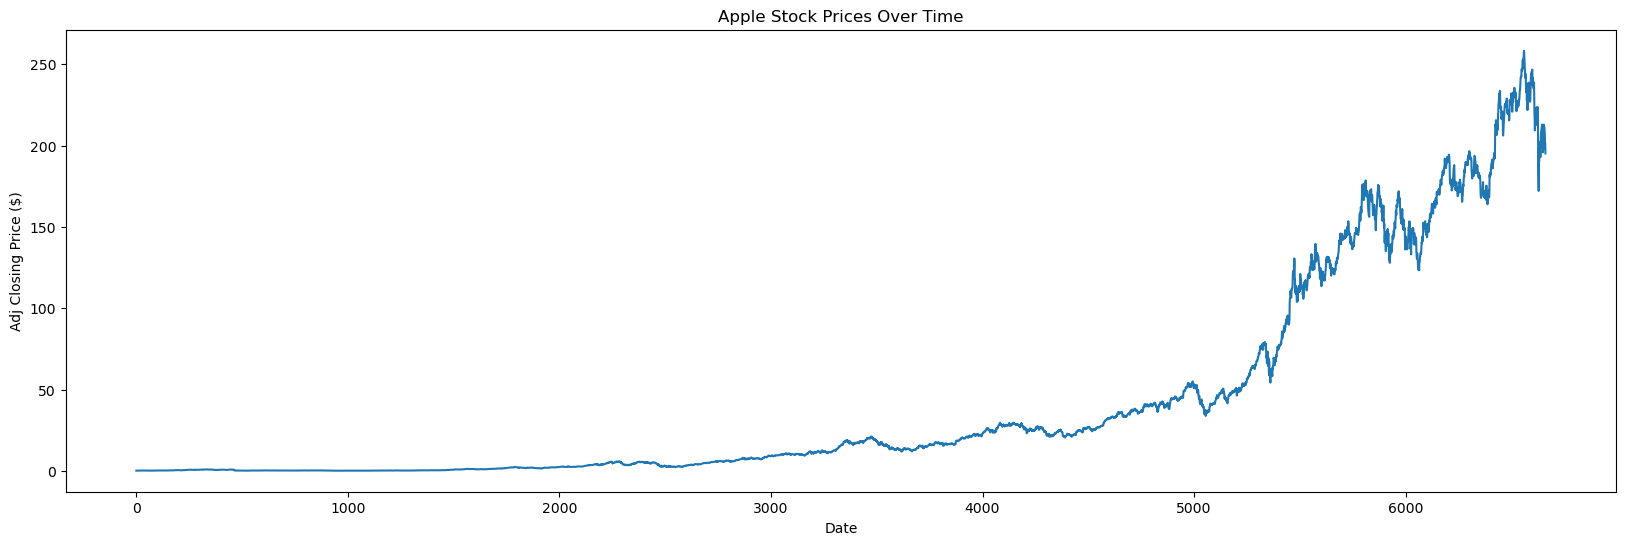

In [55]:
df['Date'] = pd.to_datetime(df.Date)
plt.figure(figsize=(20, 6))
plt.plot(df["Close"])
plt.xlabel("Date")
plt.ylabel("Adj Closing Price ($)")
plt.title("Apple Stock Prices Over Time")
plt.show()

In [56]:
import pandas as pd
import numpy as np

df['Date'] = pd.to_datetime(df['Date'])
newdf = df.set_index('Date')

daily = newdf['Close'].pct_change()
daily.dropna(inplace=True)

monthly = daily.resample("M").std() * np.sqrt(12)


C:\Users\medse\AppData\Local\Temp\ipykernel_3016\2667690331.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = daily.resample("M").std() * np.sqrt(12)


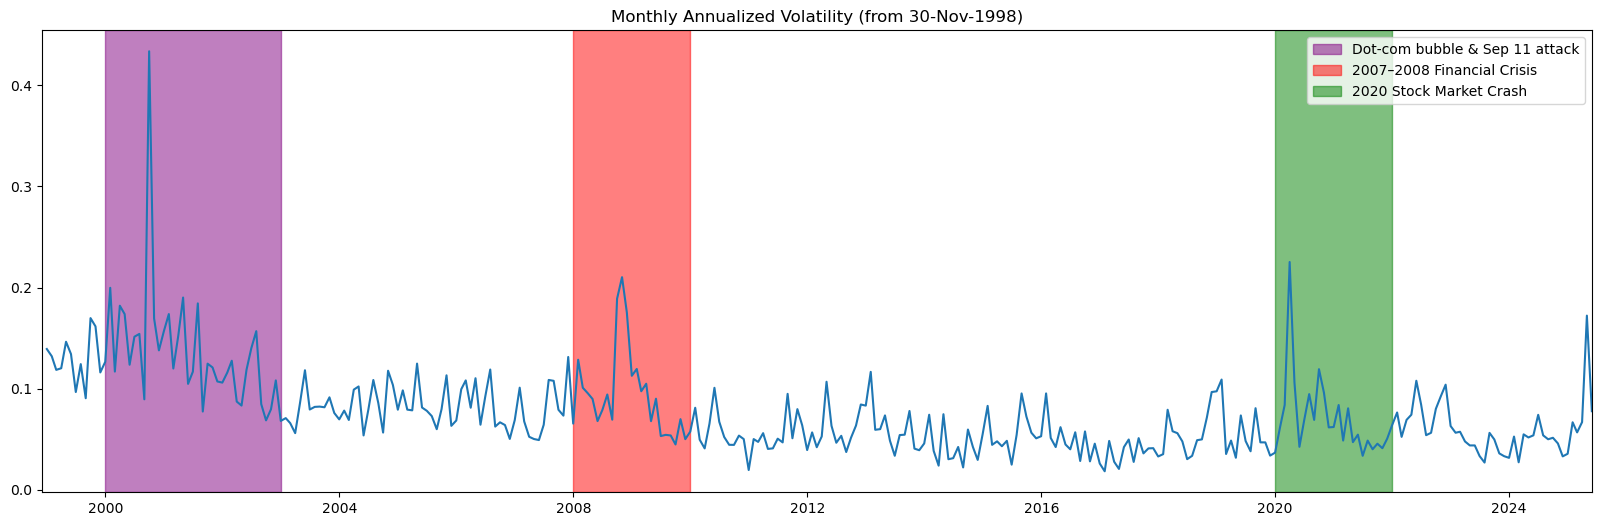

In [57]:
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.figure(figsize=(20, 6))
plt.plot(monthly)

plt.axvspan(datetime(2000, 1, 1), datetime(2002, 12, 31), color='purple', alpha=.5)
plt.axvspan(datetime(2008, 1, 1), datetime(2009, 12, 31), color='red', alpha=.5)
plt.axvspan(datetime(2020, 1, 1), datetime(2021, 12, 31), color='green', alpha=.5)

plt.xlim([datetime(1998, 11, 30), monthly.index[-1]])

plt.title("Monthly Annualized Volatility (from 30-Nov-1998)")
l1 = mpatches.Patch(color='purple', alpha=.5, label="Dot-com bubble & Sep 11 attack")
l2 = mpatches.Patch(color='red', alpha=.5, label="2007–2008 Financial Crisis")
l3 = mpatches.Patch(color='green', alpha=.5, label="2020 Stock Market Crash")
plt.legend(handles=[l1, l2, l3])

plt.show()


C:\Users\medse\AppData\Local\Temp\ipykernel_3016\1427374312.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean = newdf['Close'].resample('M').mean()


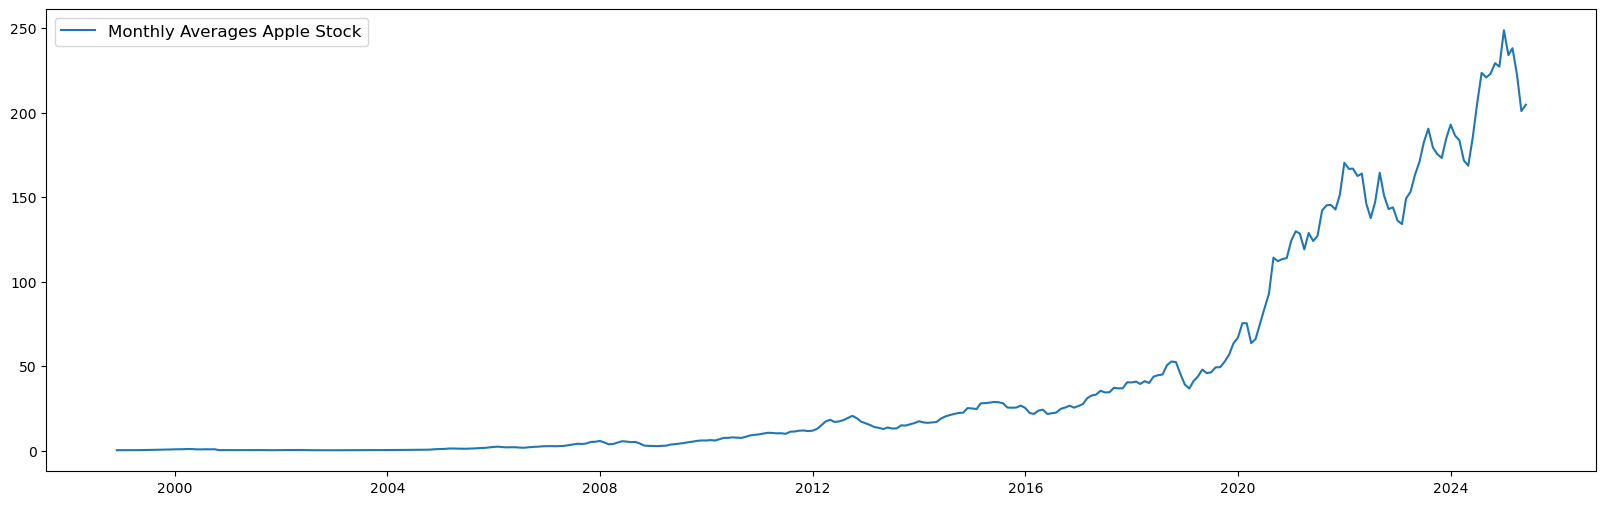

In [58]:
monthly_mean = newdf['Close'].resample('M').mean()
monthly_data = monthly_mean.to_frame()
fig = plt.figure(figsize=(20,6))
plt.plot(monthly_data['Close'],label='Monthly Averages Apple Stock')
plt.legend(prop={'size': 12})
plt.show()

<Figure size 3000x1200 with 0 Axes>

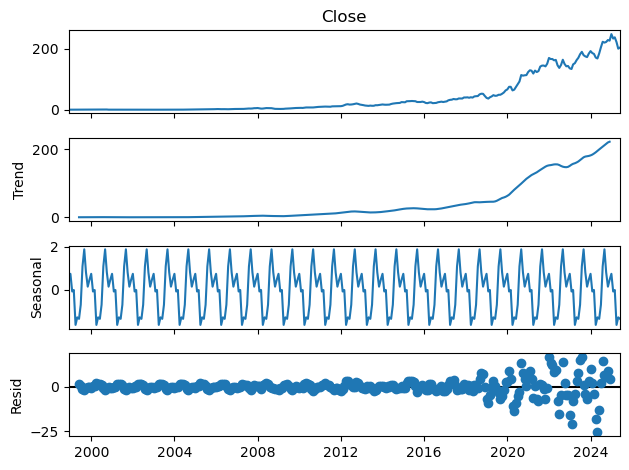

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose as sd

plt.figure(figsize=(30,12))
decomposed_series = sd(monthly_data['Close'])
decomposed_series.plot()
plt.show()

<Axes: xlabel='Date'>

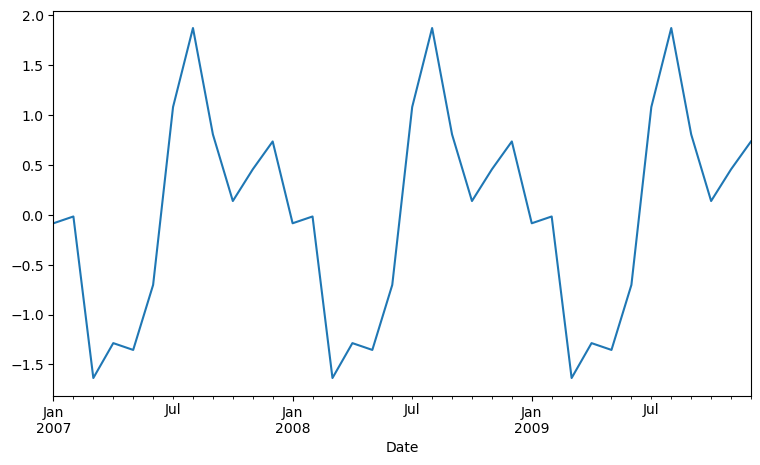

In [60]:
fig = plt.figure(figsize=(9,5))
decomposed_series.seasonal['2007':'2009'].plot()

In [61]:
from statsmodels.tsa.stattools import adfuller

def ad_fuller_func(X):
  result_ad_fuller = adfuller(X)
  print('ADF Statistic: %f' % result_ad_fuller[0])
  print('p-value: %f' %result_ad_fuller[1])
  print('Critical Values:')
  for key, value in result_ad_fuller[4].items():
   print('\t%s: %.3f' % (key, value))
 
  if result_ad_fuller[0] < result_ad_fuller[4]['5%']:
    print('Reject Null Hypothesis- Time Series is Stationary')
  else:
    print('Failed to Reject Null Hypothesis- Time Series is Non-Stationary')

ad_fuller_func(monthly_data['Close'])

ADF Statistic: 1.182249
p-value: 0.995861
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
Failed to Reject Null Hypothesis- Time Series is Non-Stationary


Text(0.5, 0, 'Lags')

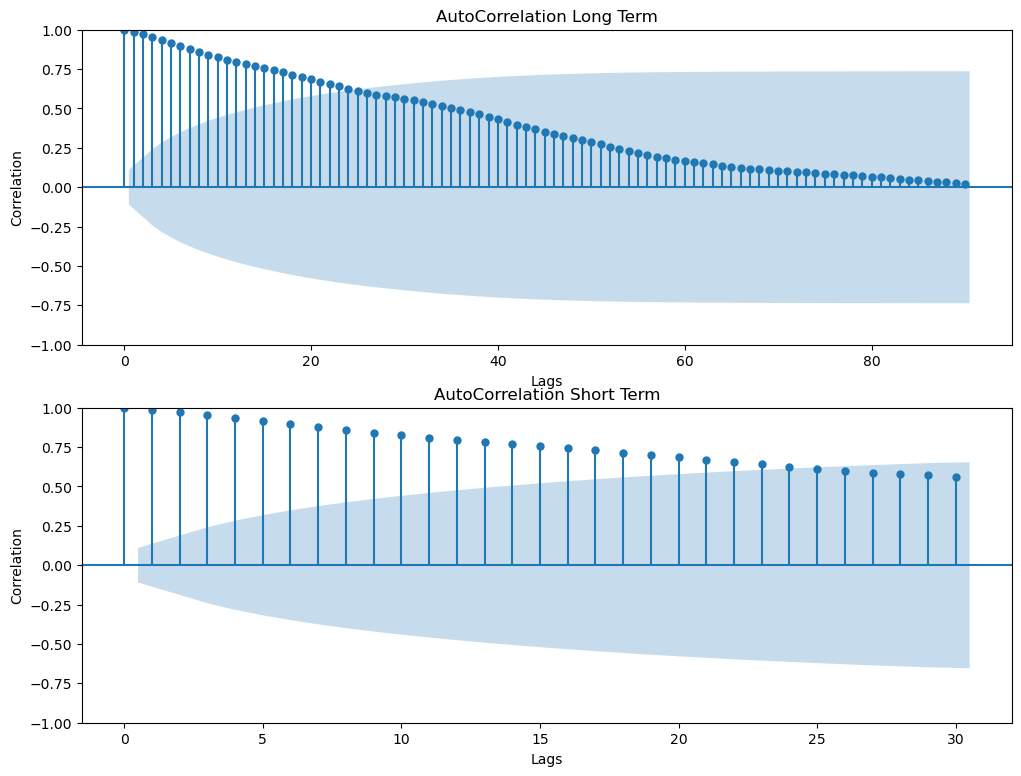

In [62]:
from statsmodels.graphics.tsaplots import plot_acf

fig,(ax1,ax2) = plt.subplots(2,figsize=(12,9))
acf = plot_acf(monthly_data['Close'],lags=90,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(monthly_data['Close'],lags=30,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

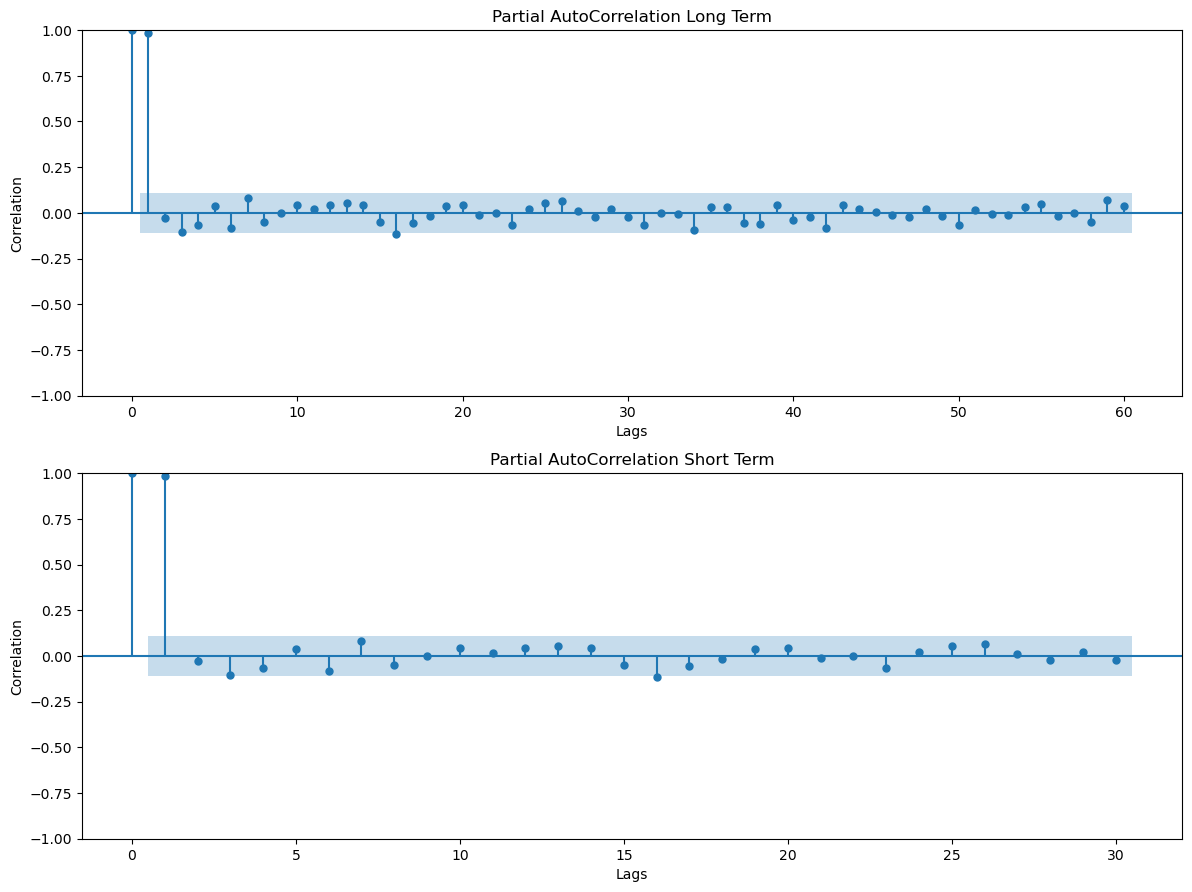

In [63]:
from statsmodels.graphics.tsaplots import plot_pacf

fig,(ax1,ax2) = plt.subplots(2,figsize=(12,9))
pacf = plot_pacf(monthly_data['Close'],lags=60,ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')
pacf = plot_pacf(monthly_data['Close'],lags=30,ax=ax2)
ax2.set_title('Partial AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

In [64]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    print("="*45)
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)

ts = monthly_data['Close']
test_stationarity(ts)

Results of Dickey-Fuller Test:
Test Statistic                   1.182249
p-value                          0.995861
#Lags Used                      16.000000
Number of Observations Used    302.000000
Critical Value (1%)             -3.452190
Critical Value (5%)             -2.871158
Critical Value (10%)            -2.571895
dtype: float64


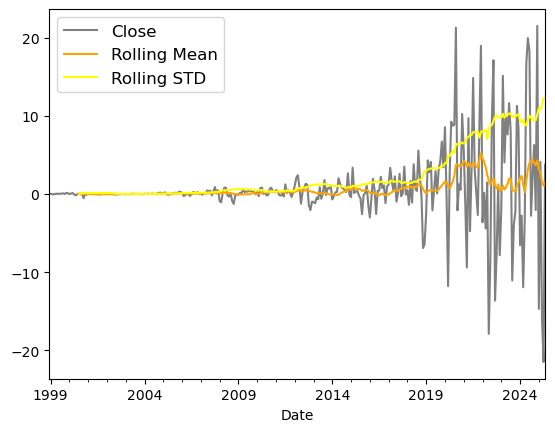

In [65]:
monthly_diff = monthly_data['Close'] - monthly_data['Close'].shift(1)
monthly_diff[1:].plot(c='grey')
monthly_diff[1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')
monthly_diff[1:].rolling(20).std().plot(label='Rolling STD',c='yellow')
plt.legend(prop={'size': 12})

In [66]:
ad_fuller_func(monthly_diff[1:])

ADF Statistic: -2.607416
p-value: 0.091474
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
Failed to Reject Null Hypothesis- Time Series is Non-Stationary


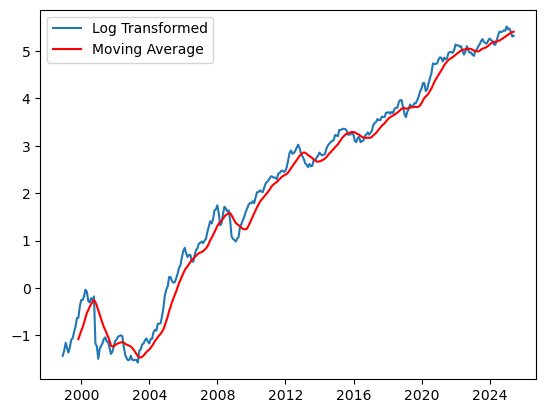

Results of Dickey-Fuller Test:
Test Statistic                -9.941895e+00
p-value                        2.650841e-17
#Lags Used                     2.000000e+00
Number of Observations Used    3.150000e+02
Critical Value (1%)           -3.451281e+00
Critical Value (5%)           -2.870760e+00
Critical Value (10%)          -2.571682e+00
dtype: float64


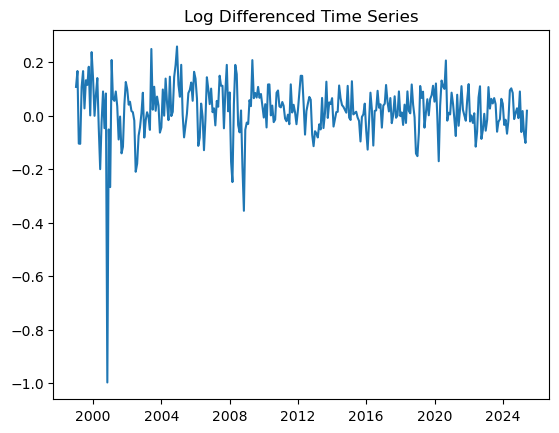

In [67]:

ts_log = np.log(ts)

moving_avg = ts_log.rolling(window=12).mean()
plt.plot(ts_log, label='Log Transformed')
plt.plot(moving_avg, color='red', label='Moving Average')
plt.legend(loc='best')
plt.show()

ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)

test_stationarity(ts_log_diff)

plt.plot(ts_log_diff)
plt.title('Log Differenced Time Series')
plt.show()

In [68]:
ad_fuller_func(ts_log_diff[1:])

ADF Statistic: -9.913556
p-value: 0.000000
Critical Values:
	1%: -3.451
	5%: -2.871
	10%: -2.572
Reject Null Hypothesis- Time Series is Stationary


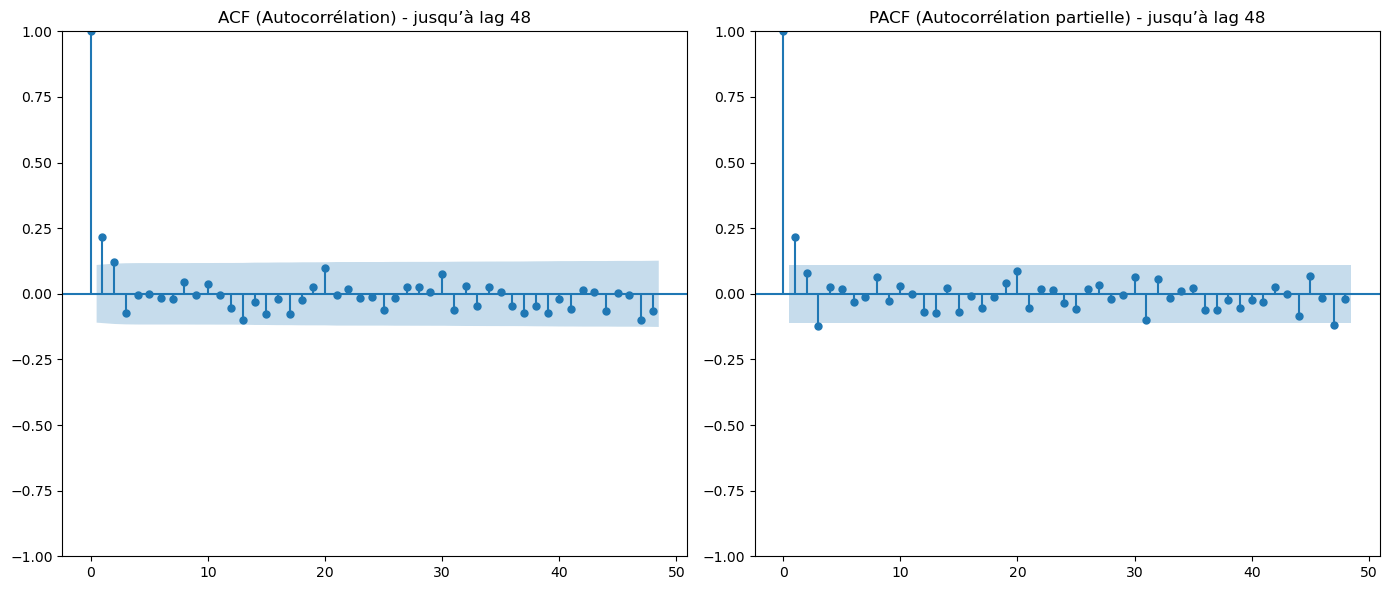

In [69]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(ts_log_diff, lags=48, ax=plt.gca())
plt.title('ACF (Autocorrélation) - jusqu’à lag 48')

plt.subplot(1, 2, 2)
plot_pacf(ts_log_diff, lags=48, ax=plt.gca(), method='ywm')
plt.title('PACF (Autocorrélation partielle) - jusqu’à lag 48')

plt.tight_layout()
plt.show()


In [70]:
modelling_series = monthly_data['Close']
from sklearn.model_selection import train_test_split as split
train,test = split(modelling_series,train_size=0.6,shuffle=False)

Observations: 130
Training Observations: 67
Testing Observations: 63
Observations: 193
Training Observations: 130
Testing Observations: 63
Observations: 256
Training Observations: 193
Testing Observations: 63
Observations: 319
Training Observations: 256
Testing Observations: 63


<Figure size 640x480 with 0 Axes>

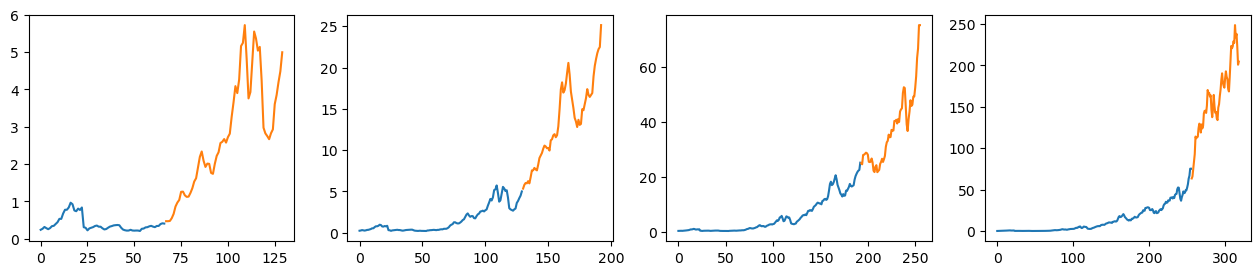

In [71]:
from sklearn.model_selection import TimeSeriesSplit

time_series_splits = TimeSeriesSplit(n_splits=4)
X = modelling_series.values
plt.figure(1)
fig = plt.figure(figsize=(24, 10))

index = 1
for train_index, test_index in time_series_splits.split(X):
 train = X[train_index]
 test = X[test_index]
 print('Observations: %d' % (len(train) + len(test)))
 print('Training Observations: %d' % (len(train)))
 print('Testing Observations: %d' % (len(test)))
    
 plt.subplot(360 + index)
 plt.plot(train)
 plt.plot([None for i in train] + [x for x in test])
 index += 1
plt.show()

In [72]:
import statsmodels.api as sm
def backtest_model(train,test):
    model = sm.tsa.SARIMAX(train,order=(2,1,1),seasonal_order=(0,1,0,12))
    results=model.fit()

    forecasts_train = results.predict(start=0,end=len(train))
    forecasts_test = results.predict(start=len(train),end=len(train)+len(test))


    fig,(ax1,ax2) = plt.subplots(2,figsize=(14,6))

    train = pd.DataFrame(train)
    test = pd.DataFrame(test)

    forecasts_train = pd.DataFrame(forecasts_train)
    forecasts_test = pd.DataFrame(forecasts_test)

    forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
    train.plot(label='Actual',ax=ax1)
    ax1.set_ylabel('Stock Price')
    ax1.set_xlabel('Time')

    forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
    test.plot(label='Actual',ax=ax2)
    ax2.set_ylabel('Stock Price')
    ax2.set_xlabel('Time')

    ax1.legend()
    ax2.legend()
    plt.tight_layout(pad=2)

c:\Users\medse\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\medse\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


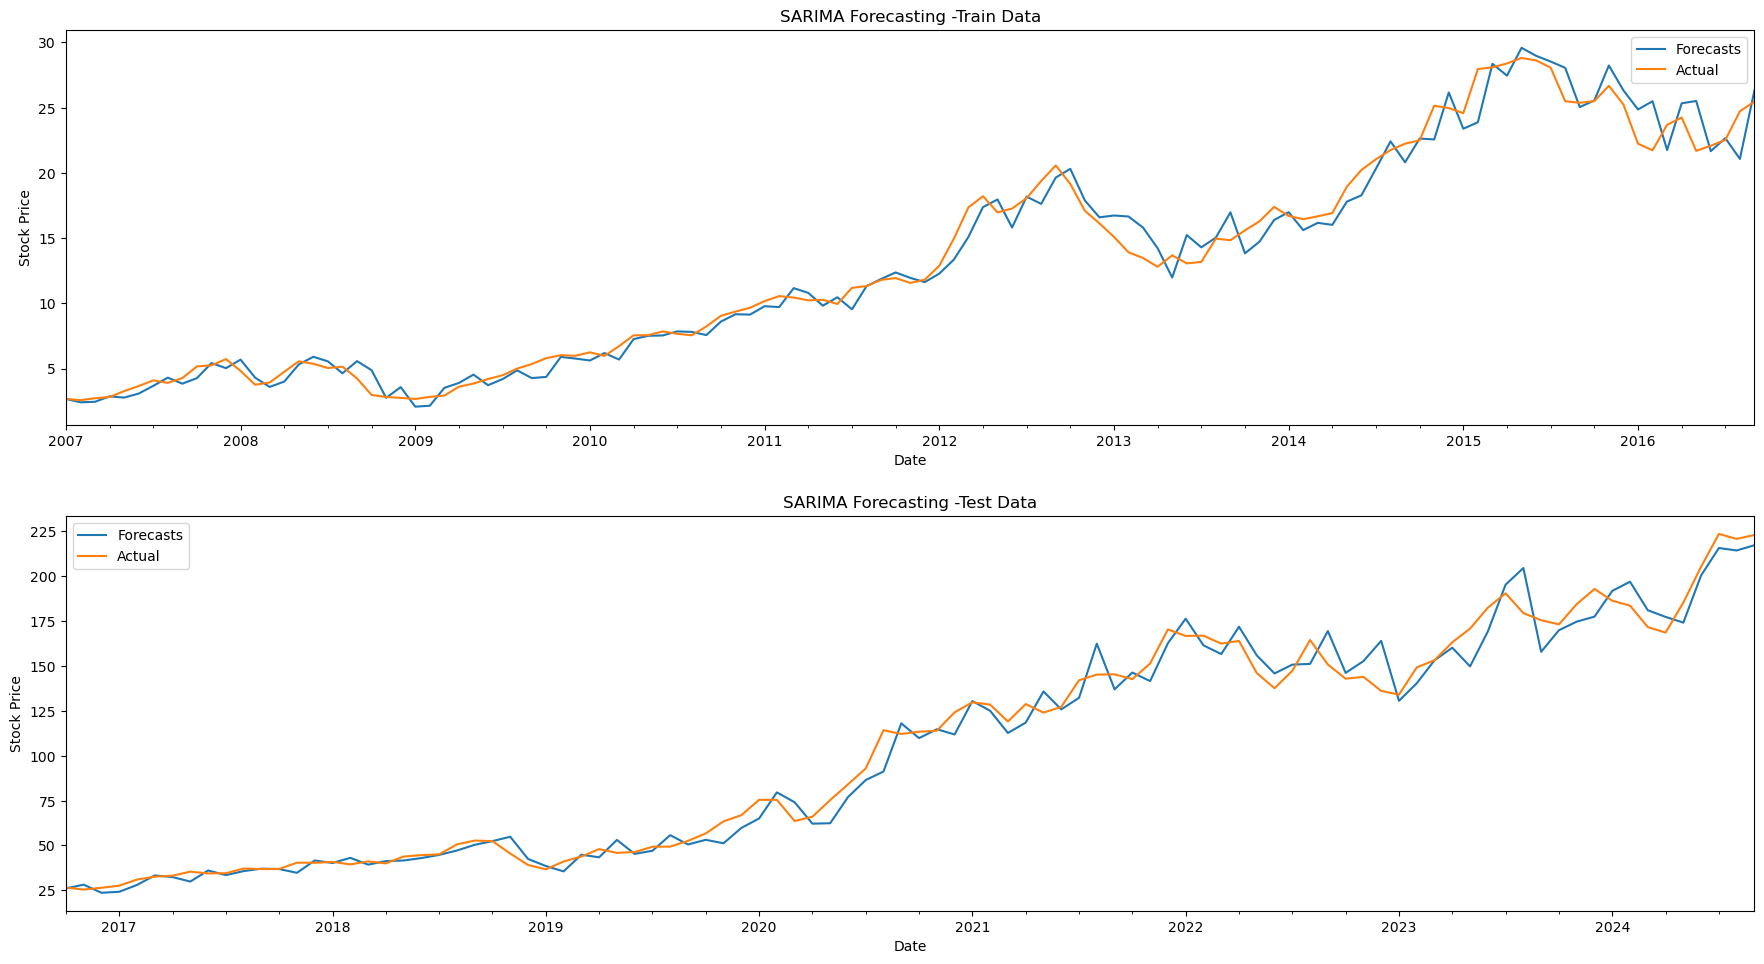

In [73]:
model = sm.tsa.SARIMAX(modelling_series,order=(2,1,1),seasonal_order=(0,1,0,12))
results=model.fit()
forecasts_train = results.predict(start='2007-01-31',end='2016-09-30')
forecasts_test = results.predict(start='2016-10-31',end='2024-09-30')

sd='2007-01-31'
ed='2016-09-30'
sd2='2016-10-31'
ed2='2024-09-30'

fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
modelling_series.loc[sd:ed].plot(label='Actual',ax=ax1)
ax1.set_ylabel('Stock Price')

forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
modelling_series.loc[sd2:ed2].plot(label='Actual',ax=ax2)
ax2.set_ylabel('Stock Price')

ax1.legend()
ax2.legend()
plt.tight_layout(pad=2)

In [74]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
def result_metrics(test_series,forecast_series,model_name):
  print('Result Metrics for {}'.format(model_name))
  print('R2 Score : ',round(r2_score(test_series,forecast_series),3))
  print('Mean Squared Error : ',round(mean_squared_error(test_series,forecast_series),3))
  print('Mean Absolute Error : ',round(mean_absolute_error(test_series,forecast_series),3))

print(result_metrics(modelling_series[sd:ed],forecasts_train,'SARIMA-Train Data'))
print('----')
print(result_metrics(modelling_series[sd2:ed2],forecasts_test,'SARIMA-Test Data'))

Result Metrics for SARIMA-Train Data
R2 Score :  0.976
Mean Squared Error :  1.565
Mean Absolute Error :  0.918
None
----
Result Metrics for SARIMA-Test Data
R2 Score :  0.979
Mean Squared Error :  75.539
Mean Absolute Error :  6.535
None


In [75]:
y_true_train = modelling_series.loc[sd:ed]
y_pred_train = forecasts_train

y_true_test = modelling_series.loc[sd2:ed2]
y_pred_test = forecasts_test


In [76]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train = mean_absolute_percentage_error(y_true_train, y_pred_train)
mape_test = mean_absolute_percentage_error(y_true_test, y_pred_test)

print(f"MAPE - Train : {mape_train:.2f}%")
print(f"MAPE - Test  : {mape_test:.2f}%")



MAPE - Train : 8.71%
MAPE - Test  : 6.65%


c:\Users\medse\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\medse\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


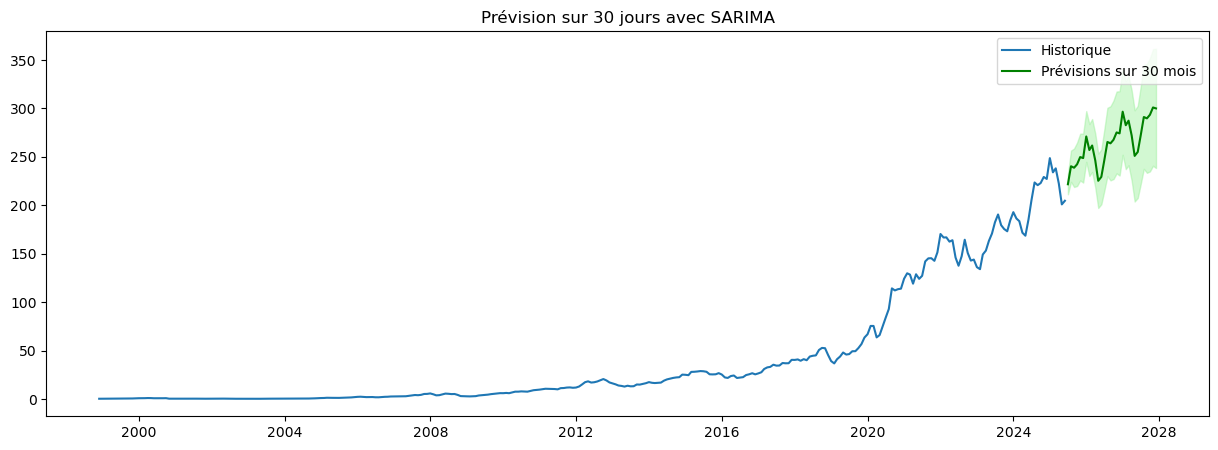

In [77]:
model = sm.tsa.SARIMAX(modelling_series, order=(2,1,1), seasonal_order=(0,1,0,12))
results = model.fit()
last_date = modelling_series.index[-1]  
forecast_30 = results.get_forecast(steps=30)
forecast_mean = forecast_30.predicted_mean
forecast_ci = forecast_30.conf_int()
plt.figure(figsize=(15,5))
plt.plot(modelling_series, label='Historique')
plt.plot(forecast_mean, label='Prévisions sur 30 mois', color='green')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='lightgreen', alpha=0.4)
plt.title('Prévision sur 30 jours avec SARIMA')
plt.legend()
plt.show()
